<a href="https://colab.research.google.com/github/lynnkuan/ML/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [30]:
titanic = pd.read_csv('titanicc.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='count', ylabel='Embarked'>

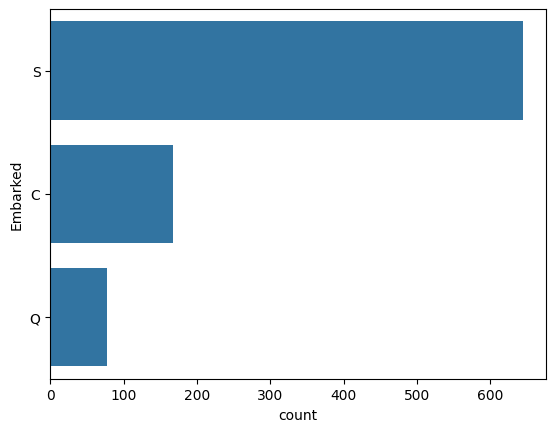

In [32]:
sns.countplot(titanic['Embarked'])

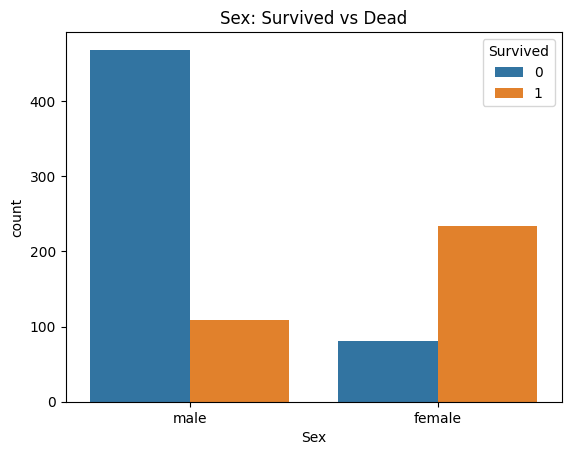

In [33]:
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Sex: Survived vs Dead')
plt.show()


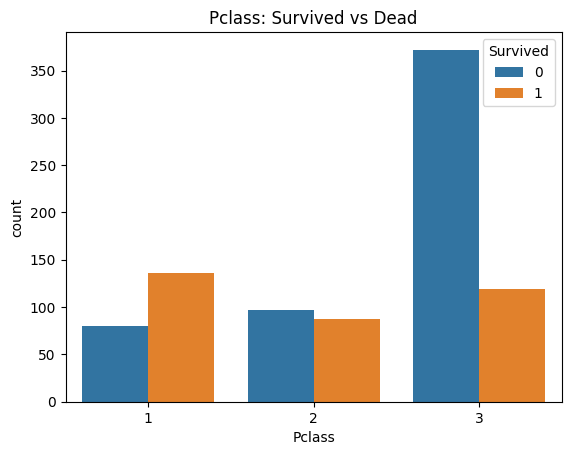

In [34]:
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Pclass: Survived vs Dead')
plt.show()


In [35]:
pd.crosstab([titanic.Sex,titanic.Survived],titanic.Pclass,margins=True).style.background_gradient(cmap='coolwarm')

TypeError: violinplot() got multiple values for argument 'data'

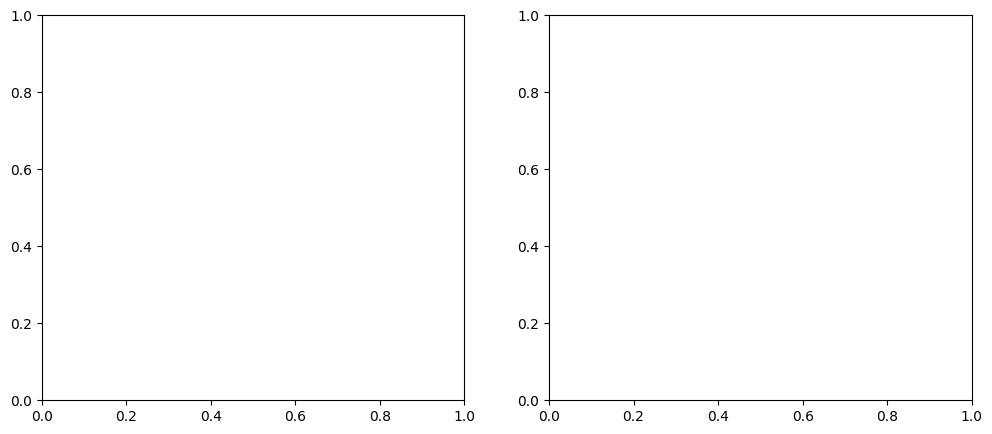

In [36]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.violinplot('Pclass','age', hue='Survived', data=titanic, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age:Survival')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Pclass','age', hue='Survived', data=titanic, split=True, ax=ax[1])

ax[1].set_title('Sex and Age:Survival')
ax[1].set_yticks(range(0,110,10))
plt.show()

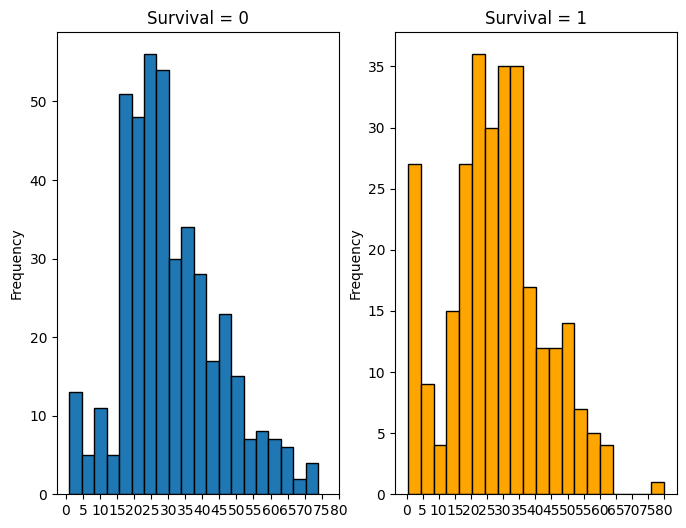

In [37]:
fig,ax=plt.subplots(1,2,figsize=(8,6))
titanic[titanic['Survived'] == 0]['Age'].plot.hist(ax=ax[0], bins=20, edgecolor='black')
ax[0].set_title('Survival = 0')
ax[0].set_xticks(range(0, 85, 5))

titanic[titanic['Survived'] == 1]['Age'].plot.hist(ax=ax[1], bins=20, edgecolor='black', color='orange')
ax[1].set_title('Survival = 1')
ax[1].set_xticks(range(0, 85, 5))
plt.show()

In [38]:
pd.crosstab(titanic.SibSp,titanic.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


資料前處理

In [39]:
titanic['Age'].fillna(titanic['Age'].median(skipna=True),inplace=True)
titanic['Embarked'].fillna('S',inplace=True)
titanic.drop('Cabin',axis=1,inplace=True)

<ipython-input-39-b32ed024d727>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(skipna=True),inplace=True)
<ipython-input-39-b32ed024d727>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [40]:
titanic.isnull().sum(axis=0)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [41]:
titanic['TravelAlone']=np.where((titanic['SibSp']+titanic['Parch'])>0,0,1)

In [42]:
titanic.drop('SibSp',axis=1,inplace=True)
titanic.drop('Parch',axis=1,inplace=True)

titanic.drop('PassengerId',axis=1,inplace=True)
titanic.drop('Name',axis=1,inplace=True)
titanic.drop('Ticket',axis=1,inplace=True)

Encoding

In [45]:
labelencoder = LabelEncoder()
titanic['Sex']= labelencoder.fit_transform(titanic['Sex'])
titanic['Embarked']= labelencoder.fit_transform(titanic['Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,1,22.0,7.2500,2,0
1,1,1,0,38.0,71.2833,0,0
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,0
4,0,3,1,35.0,8.0500,2,1


In [47]:
x_train, x_test, y_train, y_test = train_test_split(titanic.iloc[:,1:],titanic['Survived'],
                                                    test_size = 0.3,
                                                    random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, recall_score, roc_auc_score,accuracy_score,auc

result=pd.DataFrame([])

for i in range(2,10):

  model=DecisionTreeClassifier(max_depth=i)
  model.fit(x_train,y_train)
  pred=model.predict(x_test)

  cm=confusion_matrix(y_test,pred)
  fpr,tpr,thresholds = roc_curve(y_test,pred)
  result = result.append(pd.DataFrame_fromdict({
      'max_depth':i,
      'Accurarcy':accuracy_score(y_test,pred),
      'auc':auc(fpr,tpr)
  }))

result

AttributeError: 'DataFrame' object has no attribute 'append'

In [53]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, recall_score, roc_auc_score, accuracy_score, auc,recall_score,f1_score,precision_score

# 创建空 DataFrame
result = pd.DataFrame(columns=['max_depth', 'Accuracy', 'AUC'])

for i in range(2, 10):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_train, y_train)

    # 预测类别 & 预测概率
    pred = model.predict(x_test)
    prob = model.predict_proba(x_test)[:, 1]  # 取正类别的概率

    # 计算混淆矩阵 & ROC 曲线
    cm = confusion_matrix(y_test, pred)
    fpr, tpr, _ = roc_curve(y_test, prob)  # 这里要用概率值而不是预测值

    # 将结果存入 DataFrame
    result = pd.concat([result, pd.DataFrame.from_dict({
        'max_depth': [i],
        'Accuracy': [accuracy_score(y_test, pred)],
        'AUC': [auc(fpr, tpr)],
        'precision':precision_score(y_test, pred),
        'recall':recall_score(y_test, pred),
        'f1':f1_score(y_test, pred)
    })], ignore_index=True)

result

<ipython-input-53-ebdedd2ebf8f>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame.from_dict({


,max_depth,Accuracy,AUC,precision,recall,f1
0,2,0.772388,0.808429,0.890625,0.513514,0.651429
1,3,0.805970,0.822775,0.817204,0.684685,0.745098
2,4,0.824627,0.820451,0.833333,0.720721,0.772947
3,5,0.798507,0.826304,0.776699,0.720721,0.747664
4,6,0.787313,0.817209,0.837500,0.603604,0.701571
5,7,0.783582,0.804929,0.835443,0.594595,0.694737
6,8,0.783582,0.792219,0.767677,0.684685,0.723810
7,9,0.764925,0.781001,0.766667,0.621622,0.686567


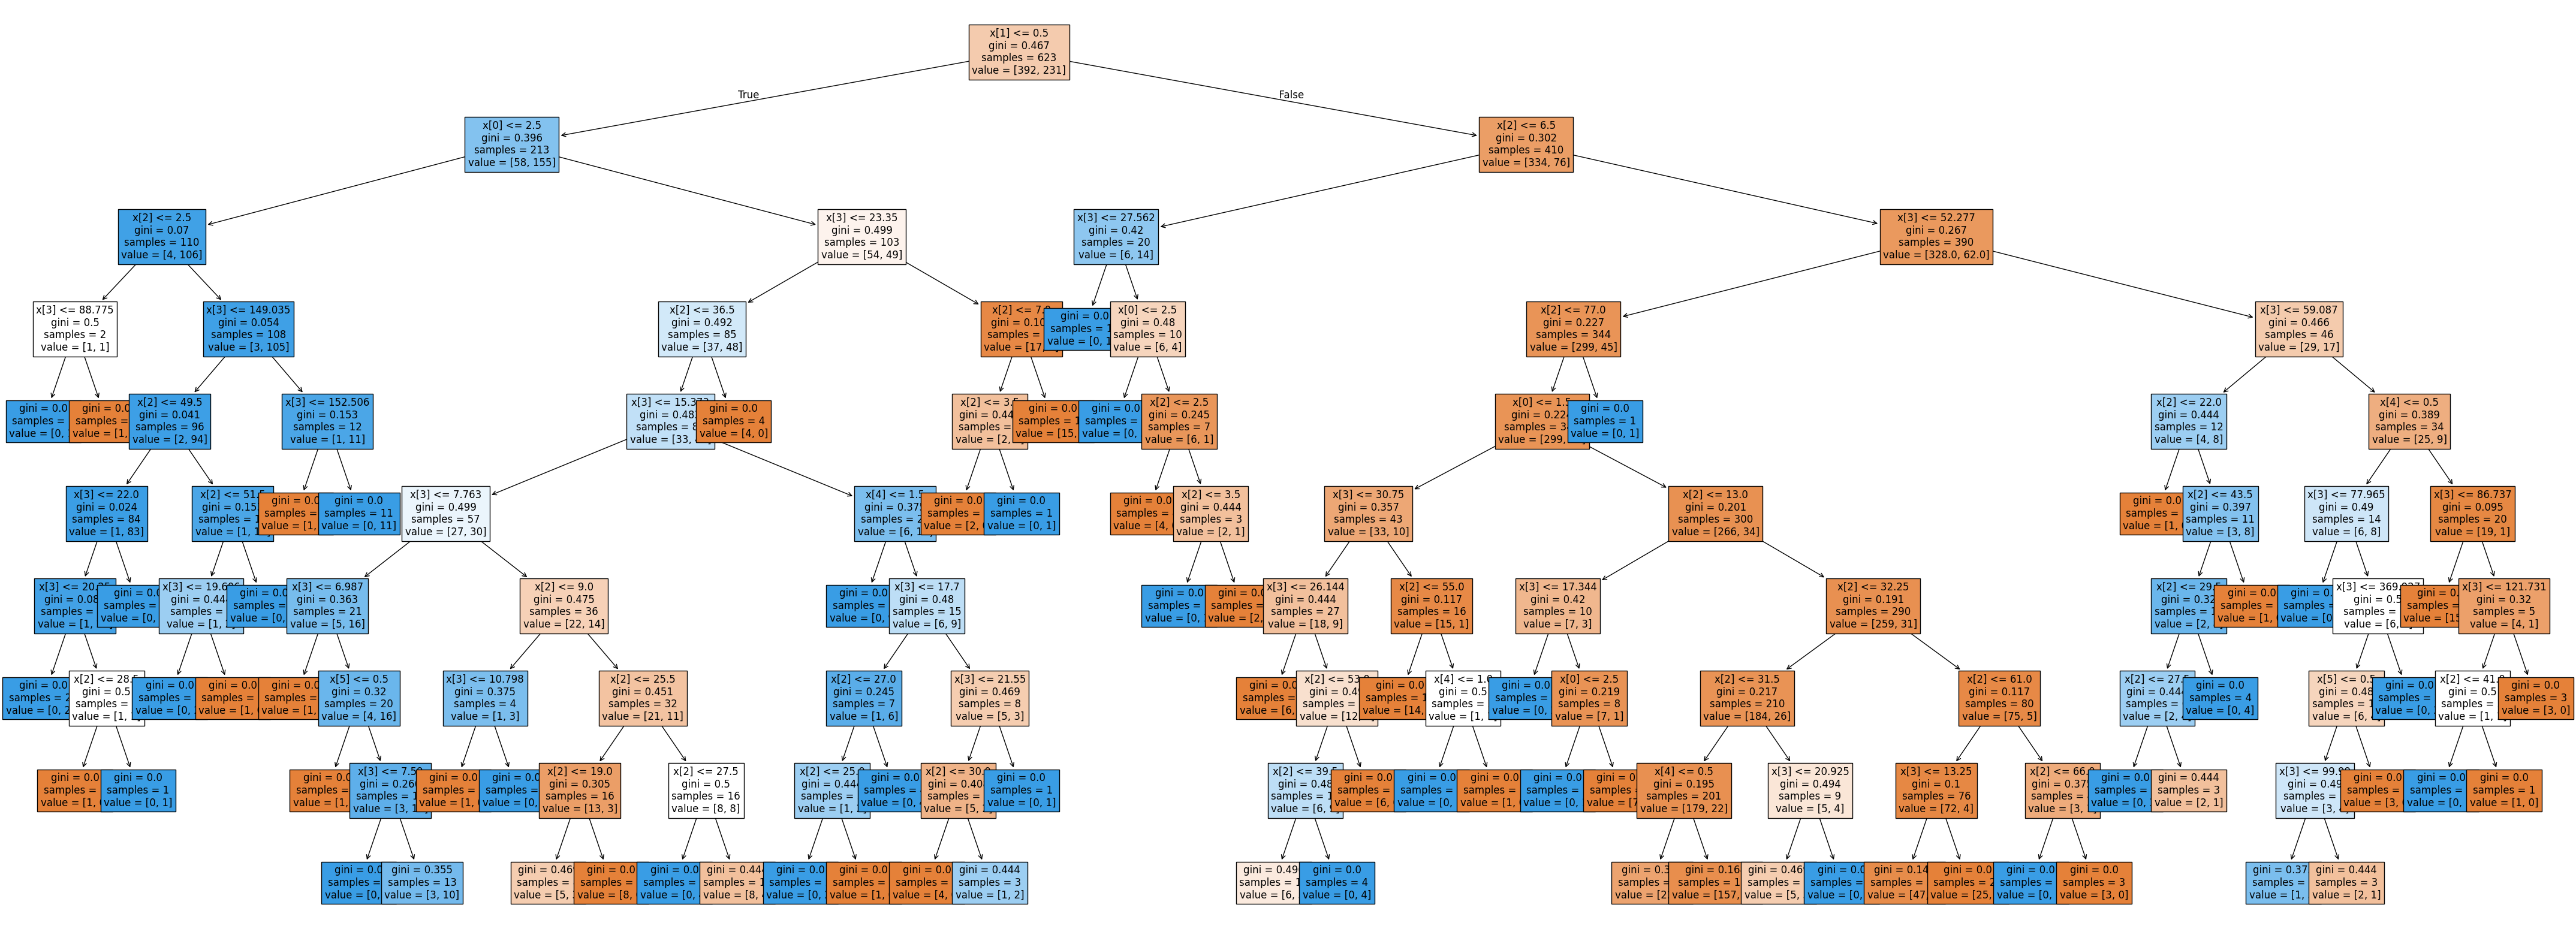

In [54]:
from sklearn import tree
plt.figure(figsize=(55,20))
tree.plot_tree(model,filled=True,fontsize=12)
plt.show()